In [1]:
import os
import statistics
import scipy as sp
import math
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.regression.linear_model import OLS
from statsmodels.stats.outliers_influence import OLSInfluence
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator, RegressorMixin
%matplotlib inline

In [2]:
os.chdir('C:\\Users\\rafal\\Desktop\\dane do licencjatu\\data')
data = pd.read_csv('danelic2019.csv',sep=';',engine='python')
data05 =  pd.read_csv('danelic2017.csv',sep=';',engine='python')
data1 = pd.read_csv('danelic2018.csv',sep=';',engine='python')
#data15 = pd.read_csv('danelic2020.csv',sep=';',engine='python')
data1=pd.DataFrame.append(data,data1)
data1=pd.DataFrame.append(data1,data05,ignore_index=True)
#data1=pd.DataFrame.append(data1,data15,ignore_index=True)
data1.sort_values('player')

,ď»żColumn1,player,nationality,position,squad,age,birth_year,value,height,position2,...,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season,Column1,Unnamed: 0
466,546.0,Aaron Connolly,ie IRL,FW,Brighton,19.0,2000.0,4000000.0,175.0,Forward - Centre-Forward,...,54.5,-13.3,-0.35,22369,0.0,0.0,0.0,201920#,NaN,NaN
7066,NaN,Aaron Cresswell,eng ENG,DF,West Ham,27.0,1989.0,12000000.0,170.0,Defender - Left-Back,...,57.8,-20.5,-0.54,56885,0.0,0.0,0.0,201718#,NaN,574.0
4691,NaN,Aaron Cresswell,eng ENG,DF,West Ham,28.0,1989.0,10000000.0,170.0,Defender - Left-Back,...,61.0,-11.9,-0.31,58336,0.0,0.0,0.0,201819#,542.0,NaN
2576,582.0,Aaron Cresswell,eng ENG,DF,West Ham,29.0,1989.0,6000000.0,170.0,Defender - Left-Back,...,61.1,-14.8,-0.39,44155,0.0,0.0,NaN,201920#,NaN,NaN
5688,NaN,Aaron Hunt,de GER,"MF,FW",Hamburger SV,30.0,1986.0,1500000.0,183.0,midfield - Attacking Midfield,...,52.7,-15.7,-0.46,50656,0.0,0.0,0.0,201718#,NaN,1120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [3]:
#adding dummy variables to dataset
data1 = pd.get_dummies(data1, columns=['league'])
data1 = data1.rename({"league_Bundesliga":"isBundesliga",
                                "league_La Liga":"isLaLiga",
                                "league_Premier League":"isPremierLeague",
                                "league_Ligue 1":"isLigue1",
                                "league_Serie A":"isSerieA"},axis='columns')
data1=pd.get_dummies(data1,columns=['Season'])
#deleting potential outliers that actually contribute nothing
data1=data1[data1['value']>1000000]
data1=data1[data1['games']>5]
data1=data1[data1['age']>0]
data1=data1[data1['height']>0]
data1

,ď»żColumn1,player,nationality,position,squad,age,birth_year,value,height,position2,...,Column1,Unnamed: 0,isBundesliga,isLaLiga,isLigue1,isPremierLeague,isSerieA,Season_201718#,Season_201819#,Season_201920#
0,21.0,Martin Aguirregabiria,es ESP,DF,AlavÄ‚Â©s,23.0,1996.0,4000000.0,178.0,Defender - Right-Back,...,NaN,NaN,0,1,0,0,0,0,0,1
1,390.0,Oliver Burke,sco SCO,"MF,FW",AlavÄ‚Â©s,22.0,1997.0,4000000.0,188.0,Forward - Right Winger,...,NaN,NaN,0,1,0,0,0,0,0,1
2,430.0,VÄ‚Â­ctor Camarasa,es ESP,MF,AlavÄ‚Â©s,25.0,1994.0,4000000.0,183.0,Midfielder - Central Midfield,...,NaN,NaN,0,1,0,0,0,0,0,1
3,737.0,RubÄ‚Â©n Duarte,es ESP,DF,AlavÄ‚Â©s,23.0,1995.0,4000000.0,172.0,Defender - Left-Back,...,NaN,NaN,0,1,0,0,0,0,0,1
5,826.0,Ljubomir Fejsa,rs SRB,MF,AlavÄ‚Â©s,30.0,1988.0,2000000.0,183.0,Midfielder - Defensive Midfield,...,NaN,NaN,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7094,NaN,Mario GĂłmez,de GER,FW,Wolfsburg,32.0,1985.0,6000000.0,189.0,attack - Centre-Forward,...,NaN,942.0,1,0,0,0,0,1,0,0
7095,NaN,Josuha Guilavogui,fr FRA,MF,Wolfsburg,26.0,1990.0,7000000.0,188.0,midfield - Defensive Midfield,...,NaN,1004.0,1,0,0,0,0,1,0,0
7102,NaN,Divock Origi,be BEL,FW,Wolfsburg,22.0,1995.0,10000000.0,185.0,attack - Centre-Forward,...,NaN,1859.0,1,0,0,0,0,1,0,0
7104,NaN,Renato Steffen,ch SUI,"FW,MF",Wolfsburg,25.0,1991.0,3500000.0,170.0,attack - Right Winger,...,NaN,2367.0,1,0,0,0,0,1,0,0


In [4]:
#MIDFIELDERS
dataMID = data1[data1['position2'].str[:10]=='Midfielder']
dataMID

,ď»żColumn1,player,nationality,position,squad,age,birth_year,value,height,position2,...,Column1,Unnamed: 0,isBundesliga,isLaLiga,isLigue1,isPremierLeague,isSerieA,Season_201718#,Season_201819#,Season_201920#
2,430.0,VÄ‚Â­ctor Camarasa,es ESP,MF,AlavÄ‚Â©s,25.0,1994.0,4000000.0,183.0,Midfielder - Central Midfield,...,NaN,NaN,0,1,0,0,0,0,0,1
5,826.0,Ljubomir Fejsa,rs SRB,MF,AlavÄ‚Â©s,30.0,1988.0,2000000.0,183.0,Midfielder - Defensive Midfield,...,NaN,NaN,0,1,0,0,0,0,0,1
20,1982.0,TomÄ‚Ë‡s Pina Isla,es ESP,MF,AlavÄ‚Â©s,31.0,1987.0,1500000.0,185.0,Midfielder - Central Midfield,...,NaN,NaN,0,1,0,0,0,0,0,1
21,2005.0,Pere Pons,es ESP,MF,AlavÄ‚Â©s,26.0,1993.0,3500000.0,177.0,Midfielder - Defensive Midfield,...,NaN,NaN,0,1,0,0,0,0,0,1
28,2633.0,Wakaso,gh GHA,MF,AlavÄ‚Â©s,29.0,1990.0,2000000.0,171.0,Midfielder - Central Midfield,...,NaN,NaN,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4715,NaN,Josuha Guilavogui,fr FRA,MF,Wolfsburg,27.0,1990.0,12000000.0,188.0,Midfielder - Defensive Midfield,...,986.0,NaN,1,0,0,0,0,0,1,0
4731,NaN,Leander Dendoncker,be BEL,MF,Wolves,23.0,1995.0,18000000.0,188.0,Midfielder - Defensive Midfield,...,618.0,NaN,0,0,0,1,0,0,1,0
4733,NaN,Morgan Gibbs-White,eng ENG,"MF,FW",Wolves,18.0,2000.0,8000000.0,171.0,Midfielder - Central Midfield,...,900.0,NaN,0,0,0,1,0,0,1,0
4736,NaN,JoĂŁo Moutinho,pt POR,MF,Wolves,31.0,1986.0,10000000.0,170.0,Midfielder - Central Midfield,...,1698.0,NaN,0,0,0,1,0,0,1,0


In [5]:
dataMID_cor = dataMID.corr()
show=pd.Series(dataMID_cor['value'])
pd.set_option('display.max_rows', None)
show.sort_values(ascending=False)

value                                     1.000000
W                                         0.530806
passes_completed_short                    0.526799
Pts                                       0.524859
passes_short                              0.520839
pass_targets                              0.516699
passes_received                           0.516602
Pts/G                                     0.510376
GDiff                                     0.506787
carries                                   0.501328
passes_ground                             0.501030
through_balls                             0.495146
GF                                        0.494037
xGDiff                                    0.493794
passes_completed                          0.492655
xGDiff/90                                 0.491324
passes_into_final_third                   0.479428
passes                                    0.477974
gca_passes_live                           0.475237
CL                             

In [6]:
def ln(x):
    return np.log(x) + 1.

#Creating a linear regression
trainMID, testMID = train_test_split(dataMID, train_size=0.8)
modelMID=smf.ols('value~age+goals+assists+height+passes_into_final_third+progressive_passes+gca'
                   '+dribbles_vs:minutes+touches_mid_3rd+fouls'
                   '+ball_recoveries+passes_received:minutes+passes_blocked:minutes+npxg_xa_per90'
                   '+passes_into_penalty_area+crosses_into_penalty_area+corner_kicks_in'
                   '+passes_received_pct:minutes+passes_completed+isPremierLeague+isLaLiga+isSerieA+isBundesliga+isLigue1',data=dataMID)
resultsMID=modelMID.fit()
resultsMID_params=resultsMID.params
#Creating a robust regression
modelMIDrobust=sm.RLM(modelMID.endog,modelMID.exog,data=trainMID).fit()
#r2_wls = sm.WLS(modelGK.endog, modelGK.exog, weights=modelGKrobust.weights).fit().rsquared
#modelGKrobustridge = sm.WLS(modelGK.endog, modelGK.exog, weights=modelGKrobust.weights).fit_regularized(alpha=0.2, L1_wt=0,start_params=resultsGK_params)
#print(modelGKrobust.summary(),
      #"R^2:", r2_wls)
finalMID1 = sm.regression.linear_model.OLSResults(modelMID, 
                                              modelMIDrobust.params, 
                                              modelMID.normalized_cov_params)
finalMID1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     45.91
Date:                Mon, 15 Feb 2021   Prob (F-statistic):          1.84e-138
Time:                        18:11:14   Log-Likelihood:                -17908.
No. Observations:                1013   AIC:                         3.586e+04
Df Residuals:                     989   BIC:                         3.598e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                   -9.542e+06   1.04e+07     -0.919      0.358   -2.99e+07    1.08e+07
age                         -9.633e+05   1.03e+05     -9.353      0.000   -1.17e+06   -7.61e+05
goals                        1.042e+06   2.34e+05      4.458      0.000    5.83e+05     1.5e+06
assists                      2.654e+04   3.42e+05      0.078      0.938   -6.44e+05    6.97e+05
height                       2.044e+05   6.76e+04      3.025      0.003    7.18e+04    3.37e+05
passes_into_final_third      1.117e+05   2.96e+04      3.776      0.000    5.37e+04     1.7e+05
progressive_passes          -1.324e+05   3.14e+04     -4.223      0.000   -1.94e+05   -7.09e+04
gca                          2.821e+05   2.08e+05      1.359      0.175   -1.25e+05    6.89e+05
dribbles_vs:minutes            -0.3852     11.516     -0.033      0.973     -22.984      22.213
touches_mid_3rd              1.343e+04   5714.837      2.349      0.019    2212.018    2.46e+04
fouls                       -3.398e+04   4.06e+04     -0.837      0.403   -1.14e+05    4.57e+04
ball_recoveries             -1.147e+04   1.34e+04     -0.855      0.393   -3.78e+04    1.49e+04
passes_received:minutes        -1.0895      1.220     -0.893      0.372      -3.483       1.304
passes_blocked:minutes         30.3606     21.283      1.426      0.154     -11.405      72.126
npxg_xa_per90                1.397e+07   4.25e+06      3.286      0.001    5.63e+06    2.23e+07
passes_into_penalty_area     2.794e+05   7.53e+04      3.712      0.000    1.32e+05    4.27e+05
crosses_into_penalty_area   -3.997e+05   1.44e+05     -2.784      0.005   -6.81e+05   -1.18e+05
corner_kicks_in             -1.429e+05   4.65e+04     -3.070      0.002   -2.34e+05   -5.16e+04
passes_received_pct:minutes   -91.9344     23.594     -3.897      0.000    -138.235     -45.634
passes_completed             1.717e+04   3687.152      4.656      0.000    9933.162    2.44e+04
isPremierLeague              2.449e+06   2.19e+06      1.121      0.263   -1.84e+06    6.74e+06
isLaLiga                    -1.309e+06   2.16e+06     -0.606      0.545   -5.55e+06    2.93e+06
isSerieA                    -3.094e+06    2.3e+06     -1.345      0.179   -7.61e+06    1.42e+06
isBundesliga                -1.657e+06   2.27e+06     -0.730      0.466   -6.11e+06     2.8e+06
isLigue1                    -5.931e+06   2.19e+06     -2.704      0.007   -1.02e+07   -1.63e+06
==============================================================================
Omnibus:                      589.214   Durbin-Watson:                   1.706
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7492.353
Skew:                           2.424   Prob(JB):                         0.00
Kurtosis:                      15.410   Cond. No.                     6.98e+21


In [7]:
#Creating a robust regression
#modelGKrobust=sm.RLM(modelGK.endog,modelGK.exog,data=trainGK).fit()
#r2_wls = sm.WLS(modelGK.endog, modelGK.exog, weights=modelGKrobust.weights).fit().rsquared
#modelGKrobustridge = sm.WLS(modelGK.endog, modelGK.exog, weights=modelGKrobust.weights).fit_regularized(alpha=0.2, L1_wt=0,start_params=resultsGK_params)
#print(modelGKrobust.summary(),
      #"R^2:", r2_wls)
#finalGK1 = sm.regression.linear_model.OLSResults(modelGK, 
                                              #modelGKrobust.params, 
                                              #modelGK.normalized_cov_params)
#print(finalGK1.summary())

In [8]:
#Creating a robust ridge regression
modelMIDrobustridge = sm.WLS(modelMID.endog, modelMID.exog, weights=modelMIDrobust.weights).fit_regularized(alpha=0.2, L1_wt=0,start_params=resultsMID_params)

finalMID2 = sm.regression.linear_model.OLSResults(modelMID, 
                                              modelMIDrobustridge.params, 
                                              modelMID.normalized_cov_params)
print(finalMID2.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     42.49
Date:                Mon, 15 Feb 2021   Prob (F-statistic):          3.29e-130
Time:                        18:11:14   Log-Likelihood:                -17928.
No. Observations:                1013   AIC:                         3.590e+04
Df Residuals:                     989   BIC:                         3.602e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [9]:
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif = pd.DataFrame()
vif["features"] = modelMID.exog_names
vif["VIF Factor"] = [variance_inflation_factor(finalMID1.model.exog, i) for i in range(finalMID1.model.exog.shape[1])]
vif

C:\Users\rafal\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\rafal\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,features,VIF Factor
0,Intercept,0.000000
1,age,1.112407
2,goals,2.223177
3,assists,4.450565
4,height,1.121990
5,passes_into_final_third,19.047168
6,progressive_passes,20.313851
7,gca,6.121224
8,dribbles_vs:minutes,6.218336
9,touches_mid_3rd,39.097006


In [10]:
#testing
#Breusch-Pagan
bptestMID=sm.stats.diagnostic.het_breuschpagan(resultsMID.resid, resultsMID.model.exog)
bptestMID

(138.67902108872312,
 4.069453368271218e-18,
 6.820376098307278,
 4.3830052689098496e-20)

In [11]:
#autocorrelation
sm.stats.stattools.durbin_watson(resultsMID.resid)

1.7247101411560049

In [12]:
#Chowtest
trainMID1=trainMID[trainMID['Season_201819#']==0]
trainMID2=trainMID[trainMID['Season_201819#']==1]
JMID = len(resultsMID.params)-1 #number of coefficients
N1MID = trainMID1.shape[0]
N2MID = trainMID2.shape[0]
RSSdMID=resultsMID.ssr
resultsMIDridge1=smf.ols('value~age+psxg_gk+games_starts+passes_pct_launched_gk+pct_goal_kicks_launched'
                  '+isPremierLeague+isLaLiga+isLigue1+clean_sheets+saves',data=trainMID1).fit_regularized(alpha=0.2, L1_wt=0.01,refit=True)
RSSbMID=resultsMIDridge1.ssr
kMID = len(resultsMIDridge1.params)-1
resultsMIDridge2=smf.ols('value~age+psxg_gk+games_starts+passes_pct_launched_gk+pct_goal_kicks_launched'
                  '+isPremierLeague+isLaLiga+isLigue1+clean_sheets+saves',data=trainMID2).fit_regularized(alpha=0.2, L1_wt=0.01,refit=True)
RSSnbMID = resultsMIDridge2.ssr
ChowMID=((RSSdMID-(RSSbMID+RSSnbMID))/JMID)/((RSSbMID+RSSnbMID)/(N1MID+N2MID-2*kMID))
pMID=sp.stats.f.cdf(ChowMID, JMID, N1MID+N2MID-2*kMID)
print(ChowMID,pMID,JMID)

-9.561391782626735 0.0 24


In [13]:
#endogeneity
from statsmodels.sandbox.regression.gmm import IV2SLS
resultsMIDridgeendog=IV2SLS(resultsMID.model.endog, resultsMID.model.exog, instrument=dataMID['minutes']).fit()
resultsMIDridgeendog.summary()
resultsMIDridgeendog.spec_hausman()

C:\Users\rafal\anaconda3\lib\site-packages\statsmodels\sandbox\regression\gmm.py:290: RuntimeWarning: invalid value encountered in sqrt
  condno = np.sqrt(eigvals[-1]/eigvals[0])
C:\Users\rafal\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 24, but rank is 22
  warnings.warn('covariance of constraints does not have full '
C:\Users\rafal\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1817: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))


(-11997136.00251055, 1.0, 23)

<AxesSubplot:>

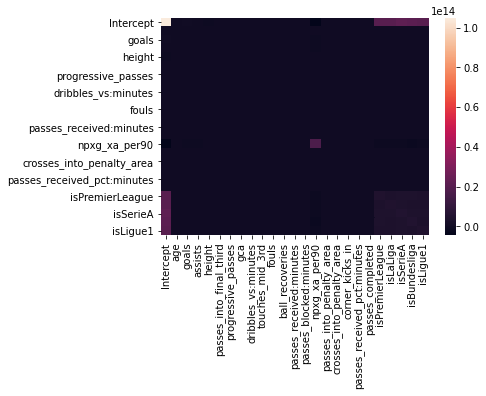

In [14]:
#correlation matrix
sm.regression.linear_model.RegressionResults.cov_params(resultsMID)
sns.heatmap(sm.regression.linear_model.RegressionResults.cov_params(resultsMID),annot=False,fmt='g')
#dataMID_cor = dataMID.corr()

In [15]:
#evaluating predictions
predictionsMID=finalMID1.predict(dataMID)
MIDpredtrain=finalMID1.predict(trainMID)
MIDpredtest=finalMID1.predict(testMID)
rmsetrainMID=sm.tools.eval_measures.rmse(trainMID['value'],MIDpredtrain)
rmsetestMID=sm.tools.eval_measures.rmse(testMID['value'],MIDpredtest)
print(rmsetrainMID,rmsetestMID)

11670631.128747366 10870366.875320243


In [16]:
#cross validation
class SMWrapper(BaseEstimator, RegressorMixin):
    """ A universal sklearn-style wrapper for statsmodels regressors """
    def __init__(self, model_class, fit_intercept=True):
        self.model_class = model_class
        self.fit_intercept = fit_intercept
    def fit(self, X, y):
        if self.fit_intercept:
            X = sm.add_constant(X)
        self.model_ = self.model_class(y, X)
        self.results_ = self.model_.fit()
    def predict(self, X):
        if self.fit_intercept:
            X = sm.add_constant(X)
        return self.results_.predict(X)
    
print(cross_val_score(SMWrapper(sm.OLS), modelMID.exog, modelMID.endog, scoring='neg_mean_squared_error'))

[-1.19362024e+14 -1.28851419e+14 -1.64243468e+14 -1.51539652e+14
 -1.35976610e+14]


In [17]:
#some dope plots and other stuff
#multicollinearity
np.linalg.cond(resultsMID.model.exog)

6.982635839361616e+21

<AxesSubplot:>

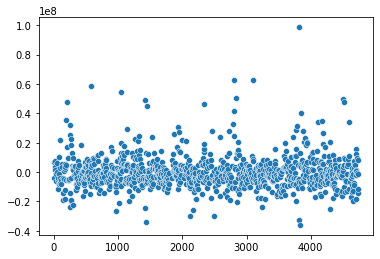

In [18]:
sns.scatterplot(data=resultsMID.resid)

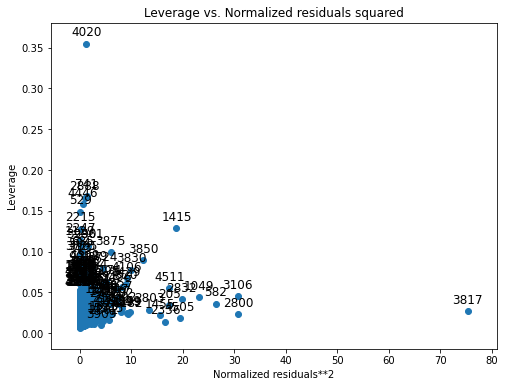

In [19]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(resultsMID, ax = ax)

In [20]:
#Actual predictions
dataMID['preds']=predictionsMID
dataseason1920=dataMID[dataMID['Season_201920#']==1]
dataMID.sort_values('preds',ascending=False)[0:10]

<ipython-input-20-84994d1cd362>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataMID['preds']=predictionsMID


,ď»żColumn1,player,nationality,position,squad,age,birth_year,value,height,position2,...,Unnamed: 0,isBundesliga,isLaLiga,isLigue1,isPremierLeague,isSerieA,Season_201718#,Season_201819#,Season_201920#,preds
3724,NaN,Kai Havertz,de GER,"MF,FW",Leverkusen,19.0,1999.0,90000000.0,189.0,Midfielder - Attacking Midfield,...,NaN,1,0,0,0,0,0,1,0,6.028618e+07
1415,631.0,Kevin De Bruyne,be BEL,MF,Manchester City,28.0,1991.0,120000000.0,181.0,Midfielder - Attacking Midfield,...,NaN,0,0,0,1,0,0,0,1,6.002652e+07
1426,2131.0,Rodri,es ESP,MF,Manchester City,23.0,1996.0,64000000.0,191.0,Midfielder - Defensive Midfield,...,NaN,0,0,0,1,0,0,0,1,5.807310e+07
3850,NaN,Paul Pogba,fr FRA,MF,Manchester Utd,25.0,1993.0,100000000.0,191.0,Midfielder - Central Midfield,...,NaN,0,0,0,1,0,0,1,0,5.447892e+07
3105,NaN,Jorginho,it ITA,MF,Chelsea,26.0,1991.0,65000000.0,180.0,Midfielder - Defensive Midfield,...,NaN,0,0,0,1,0,0,1,0,5.447652e+07
1694,2181.0,FabiÄ‚Ë‡n Ruiz PeÄ‚Â±a,es ESP,MF,Napoli,23.0,1996.0,50000000.0,189.0,Midfielder - Central Midfield,...,NaN,0,0,0,0,1,0,0,1,5.301343e+07
1270,1063.0,Kai Havertz,de GER,"MF,FW",Leverkusen,20.0,1999.0,81000000.0,189.0,Midfielder - Attacking Midfield,...,NaN,1,0,0,0,0,0,0,1,5.284111e+07
2861,NaN,Joshua Kimmich,de GER,"DF,MF",Bayern Munich,23.0,1995.0,70000000.0,177.0,Midfielder - Defensive Midfield,...,NaN,1,0,0,0,0,0,1,0,5.183378e+07
3219,NaN,Axel Witsel,be BEL,MF,Dortmund,29.0,1989.0,32000000.0,188.0,Midfielder - Defensive Midfield,...,NaN,1,0,0,0,0,0,1,0,5.042674e+07
3830,NaN,David Silva,es ESP,MF,Manchester City,32.0,1986.0,20000000.0,170.0,Midfielder - Attacking Midfield,...,NaN,0,0,0,1,0,0,1,0,4.937312e+07
